In [8]:
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import sem
import datetime

In [9]:
summary2015 = pd.read_csv('Data_Cleaning/clean_data/focused_airports_2015.csv', index_col=0)
summary2016 = pd.read_csv('Data_Cleaning/clean_data/focused_airports_2016.csv', index_col=0)
summary2017 = pd.read_csv('Data_Cleaning/clean_data/focused_airports_2017.csv', index_col=0)
summary2018 = pd.read_csv('Data_Cleaning/clean_data/focused_airports_2018.csv', index_col=0)

summary1 = summary2015.append(summary2016)
summary2 = summary1.append(summary2017)
summary = summary2.append(summary2018)

total_flights = summary.reset_index()

In [10]:
#All Flights
total_flights

,Date,Origin,Destination,Expected Departure Time,Expected Arrival Time,Distance,Weather Delay
0,2015-01-01,DFW,BWI,1342,1724,1217.0,0
1,2015-01-01,ORD,OAK,1534,1819,1836.0,0
2,2015-01-01,LAX,IAH,1648,2155,1379.0,0
3,2015-01-01,ORD,ATL,1105,1355,606.0,0
4,2015-01-01,ORD,GRB,1310,1358,173.0,0
...,...,...,...,...,...,...,...
5324042,2018-12-31,LAX,IAH,720,1235,1379.0,0
5324043,2018-12-31,ORD,PHL,2035,2331,678.0,0
5324044,2018-12-31,LAX,PHL,720,1522,2402.0,0
5324045,2018-12-31,DFW,MCI,1725,1856,460.0,0


In [11]:
flight_summary = pd.read_csv('Summary Flight Tables/airport_summary.csv', index_col=0)
monthly_summary = pd.read_csv('Summary Flight Tables/monthly_summary.csv', index_col=0)
weather_summary = pd.read_csv('airport_weather_data_result.csv', index_col=0)

In [12]:
#Cancelled and Non-Cancelled Flights by Airport
flight_summary

,Airport,# Cancelled Flights,# Non-Cancelled Flights,Total Flights
0,DFW,10181,900961,911142
1,ATL,7701,1505703,1513404
2,DEN,5989,891080,897069
3,LAX,2372,853024,855396
4,ORD,13418,1133618,1147036


In [13]:
#Total Cancelled and Non-Cancelled Flights
monthly_summary

,Date,# Cancelled Flights,# Non-Cancelled Flights,Total Flights
0,2015-01-31,1250,108150,109400
1,2015-02-28,4296,96062,100358
2,2015-03-31,1759,116298,118057
3,2015-04-30,585,112765,113350
4,2015-05-31,919,116066,116985
5,2015-06-30,886,117737,118623
6,2015-07-31,243,122228,122471
7,2015-08-31,355,121185,121540
8,2015-09-30,187,112242,112429
9,2015-10-31,371,116546,116917


In [14]:
#Total Weather Summary
weather_summary

,Date,Airport,Latitude,Longitude,Max Temp,Precip,Precip Type,Wind Speed
0,2015-01-01,DFW,32.896,-97.037,36.0,0.58,"rain,snow,",8.0
1,2015-01-02,DFW,32.896,-97.037,39.8,0.28,"rain,",11.4
2,2015-01-03,DFW,32.896,-97.037,54.0,0.43,"rain,",12.7
3,2015-01-04,DFW,32.896,-97.037,43.1,0.00,NaN,27.7
4,2015-01-05,DFW,32.896,-97.037,46.1,0.00,NaN,16.1
...,...,...,...,...,...,...,...,...
7300,2018-12-27,ORD,41.979,-87.904,53.1,0.66,"rain,",20.8
7301,2018-12-28,ORD,41.979,-87.904,53.1,0.06,"rain,",23.0
7302,2018-12-29,ORD,41.979,-87.904,29.9,0.07,"rain,snow,",17.2
7303,2018-12-30,ORD,41.979,-87.904,35.1,0.00,NaN,17.2


In [17]:
weather_summary['Date'] = pd.to_datetime(weather_summary['Date'])

In [18]:
weather_summary.dtypes

Date           datetime64[ns]
Airport                object
Latitude              float64
Longitude             float64
Max Temp              float64
Precip                float64
Precip Type            object
Wind Speed            float64
dtype: object

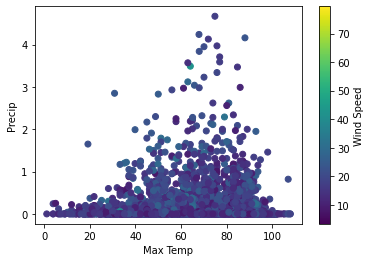

In [19]:
#Temp vs precipitation & for cancelled flights 
plt.scatter(weather_summary['Max Temp'],weather_summary['Precip'],c=weather_summary['Wind Speed'])
clb = plt.colorbar()
plt.xlabel("Max Temp")
plt.ylabel("Precip")
clb.set_label("Wind Speed")
plt.show()

In [20]:
#Correlation
precip = weather_summary.iloc[:,5]
max_temp = weather_summary.iloc[:,4]
correlation = st.pearsonr(precip,max_temp)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.03


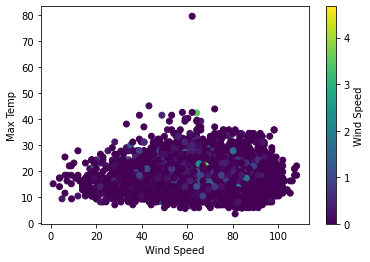

In [21]:
#Temp vs Wind Speed & for cancelled flights 
plt.scatter(weather_summary['Max Temp'],weather_summary['Wind Speed'],c=weather_summary['Precip'])
clb = plt.colorbar()
plt.xlabel("Wind Speed")
plt.ylabel("Max Temp")
clb.set_label("Wind Speed")
plt.show()

In [22]:
#Correlation
wind_speed = weather_summary.iloc[:,7]
max_temp = weather_summary.iloc[:,4]
correlation = st.pearsonr(wind_speed,max_temp)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.07


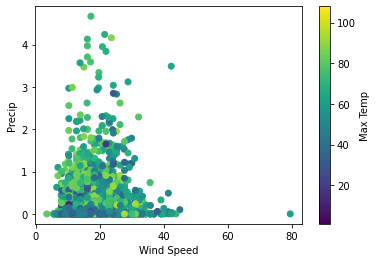

In [23]:
#Wind speed vs precipitation &  temp as colored data points for cancelled flights 
plt.scatter(weather_summary['Wind Speed'],weather_summary['Precip'],c=weather_summary['Max Temp'])
clb = plt.colorbar()
plt.xlabel("Wind Speed")
plt.ylabel("Precip")
clb.set_label("Max Temp")
plt.show()

In [24]:
#Correlation
wind_speed = weather_summary.iloc[:,7]
precip = weather_summary.iloc[:,5]
correlation = st.pearsonr(wind_speed,precip)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.09


In [25]:
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(wind_speed, precip)
pe_fit = pe_slope * wind_speed + pe_int

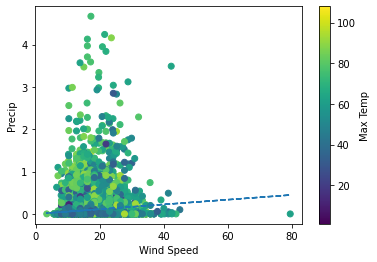

In [26]:
plt.scatter(weather_summary['Wind Speed'],weather_summary['Precip'],c=weather_summary['Max Temp'])
clb = plt.colorbar()
plt.xlabel("Wind Speed")
plt.ylabel("Precip")
clb.set_label("Max Temp")
plt.plot(wind_speed,pe_fit,"--")
plt.show()

In [27]:
#summary_date = weather_summary.set_index('Date', inplace=True)
#summary_date = weather_summary.index = pd.to_datetime(weather_summary.index)
#weather_summary

In [29]:
weather_summary

,Date,Airport,Latitude,Longitude,Max Temp,Precip,Precip Type,Wind Speed
0,2015-01-01,DFW,32.896,-97.037,36.0,0.58,"rain,snow,",8.0
1,2015-01-02,DFW,32.896,-97.037,39.8,0.28,"rain,",11.4
2,2015-01-03,DFW,32.896,-97.037,54.0,0.43,"rain,",12.7
3,2015-01-04,DFW,32.896,-97.037,43.1,0.00,NaN,27.7
4,2015-01-05,DFW,32.896,-97.037,46.1,0.00,NaN,16.1
...,...,...,...,...,...,...,...,...
7300,2018-12-27,ORD,41.979,-87.904,53.1,0.66,"rain,",20.8
7301,2018-12-28,ORD,41.979,-87.904,53.1,0.06,"rain,",23.0
7302,2018-12-29,ORD,41.979,-87.904,29.9,0.07,"rain,snow,",17.2
7303,2018-12-30,ORD,41.979,-87.904,35.1,0.00,NaN,17.2


In [30]:
weather_summary.dtypes

Date           datetime64[ns]
Airport                object
Latitude              float64
Longitude             float64
Max Temp              float64
Precip                float64
Precip Type            object
Wind Speed            float64
dtype: object

In [31]:
weather_summary['Date'].dt.day

0        1
1        2
2        3
3        4
4        5
        ..
7300    27
7301    28
7302    29
7303    30
7304    31
Name: Date, Length: 7305, dtype: int64

In [32]:
#Total Weather Summary by Month
weather_summary['month_name']=weather_summary['Date'].dt.month_name

In [33]:
weather_summary

,Date,Airport,Latitude,Longitude,Max Temp,Precip,Precip Type,Wind Speed,month_name
0,2015-01-01,DFW,32.896,-97.037,36.0,0.58,"rain,snow,",8.0,<bound method PandasDelegate._add_delegate_acc...
1,2015-01-02,DFW,32.896,-97.037,39.8,0.28,"rain,",11.4,<bound method PandasDelegate._add_delegate_acc...
2,2015-01-03,DFW,32.896,-97.037,54.0,0.43,"rain,",12.7,<bound method PandasDelegate._add_delegate_acc...
3,2015-01-04,DFW,32.896,-97.037,43.1,0.00,NaN,27.7,<bound method PandasDelegate._add_delegate_acc...
4,2015-01-05,DFW,32.896,-97.037,46.1,0.00,NaN,16.1,<bound method PandasDelegate._add_delegate_acc...
...,...,...,...,...,...,...,...,...,...
7300,2018-12-27,ORD,41.979,-87.904,53.1,0.66,"rain,",20.8,<bound method PandasDelegate._add_delegate_acc...
7301,2018-12-28,ORD,41.979,-87.904,53.1,0.06,"rain,",23.0,<bound method PandasDelegate._add_delegate_acc...
7302,2018-12-29,ORD,41.979,-87.904,29.9,0.07,"rain,snow,",17.2,<bound method PandasDelegate._add_delegate_acc...
7303,2018-12-30,ORD,41.979,-87.904,35.1,0.00,NaN,17.2,<bound method PandasDelegate._add_delegate_acc...


In [28]:
monthly_precip = monthly_weather.plot(kind="bar", title="Precipitation by Months for cancellations")
monthly_precip.set_xlabel("Date")
monthly_precip.set_ylabel("Precip")

plt.show()
plt.tight_layout()

NameError: name 'monthly_weather' is not defined

In [ ]:
# Calculate means
means = monthly_weather['Precip'].mean()
# Calculate standard error on means
sems = monthly_weather['Precip'].sem()

In [ ]:
#Precipitation and months for cancellations
fig, ax = plt.subplots()
ax.errorbar(np.arange(0, len(monthly_weather), 1)+1, means, yerr=sems, fmt="o", color="b")
ax.set_xlim(0, len(means)+1)
ax.set_xlabel("Months")
ax.set_ylabel("Preciptation (Ins)")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.show()

In [ ]:
#Wind speed and months for cancellations